## Name: HABIMANA Martin
#### Neural networks: Assignment 1

#### Problem 5: Playing with code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [2]:
class Network(object):
    def __init__(self, n):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        return sigmoid(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += 0.5*np.dot(y, y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data), 
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)
                
            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))
            
            print('Epoch '+str(i)+' finished')
        
        return res
        
    
### THE PART BELOW WILL BE EXPLAINED LATER
        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)
        
        # backward
        delta_2 = self.cost_derivative(a2, y) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
            
    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)  

In [3]:
def sigmoid(z):
    return 1 / (1.0+np.exp(-z))
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [4]:
def load_data():
    # Note you have to update the path below
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data

In [5]:
TRAIN, VALIDATION, TEST = load_data()

In [6]:
len(TRAIN), len(TRAIN[0]), len(TRAIN[1])

(2, 50000, 50000)

In [7]:
TRAIN[0][0].shape, TRAIN[1][0]

((784,), 5)

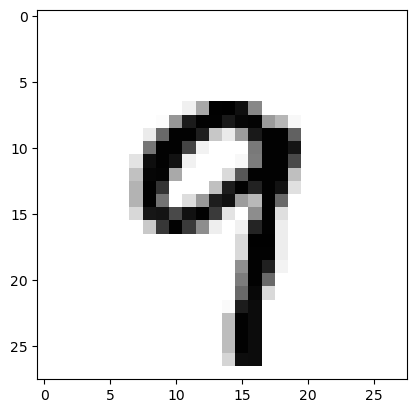

In [8]:
IM = np.reshape(TRAIN[0][170], (28, 28))
plt.imshow(1-IM, cmap='gray')

In [9]:
TRAIN[1][170]

9

In [10]:
def zip_data(D):
    return list(zip(D[0], D[1]))

In [11]:
train_data = zip_data(TRAIN)
validation_data = zip_data(VALIDATION)
test_data = zip_data(TEST)

In [12]:
NET = Network(30)

In [13]:
NET.bprime

array([-0.42493188, -0.26726064, -0.02307628, -1.39359883,  0.61185956,
        0.71758035, -0.16313453, -0.68273747, -0.47546666, -0.2552341 ])

In [14]:
print(NET.feedforward(train_data[3][0]))

[0.98031778 0.89759161 0.07566888 0.93309347 0.08747051 0.48261377
 0.03071879 0.80038947 0.56961753 0.99966584]


In [15]:
NET.evaluate(train_data) # We should expect the accuracy to be around 10%

(2.2432987919053264, 0.11478)

### Too small learning rate

In [16]:
results = NET.SGD(train_data, 30, 10, 0.001, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


In [17]:
results

[((1.1980122642412854, 0.1051), (1.1933994268862116, 0.106)),
 ((0.9203130694915963, 0.10394), (0.9158156470536505, 0.1056)),
 ((0.6222255951630994, 0.12792), (0.6222858195874222, 0.1304)),
 ((0.5110154340805082, 0.1508), (0.5074191769626768, 0.1555)),
 ((0.4942589218005743, 0.16032), (0.4908542436218814, 0.1647)),
 ((0.4870392191039934, 0.16826), (0.48389351685106996, 0.1712)),
 ((0.4826076842251209, 0.17494), (0.47962842856205623, 0.1777)),
 ((0.47935055819121525, 0.18146), (0.4764647072300581, 0.1839)),
 ((0.47666212370296684, 0.18776), (0.4738183028954799, 0.1888)),
 ((0.47425458704129736, 0.19354), (0.4714123461696045, 0.1949)),
 ((0.4719718660853434, 0.2002), (0.4690951164595286, 0.2026)),
 ((0.4697190745242704, 0.2077), (0.4667773450700228, 0.2104)),
 ((0.46743766687086324, 0.2152), (0.46440151197324747, 0.2183)),
 ((0.4650845613344779, 0.22228), (0.46192487372437624, 0.226)),
 ((0.4626335358513715, 0.22936), (0.4593218557697272, 0.2341)),
 ((0.4600726647795988, 0.2366), (0.4565

In [18]:
def plot_results(res):
    X = list(range(len(res)))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    train_acc = [x[0][1] for x in res]
    test_acc = [x[1][1] for x in res]
    ax1.plot(X, train_acc, label='train')
    ax1.plot(X, test_acc, label='test')
    ax1.set_title('Accuracy')
    ax1.legend()
    
    train_cost = [x[0][0] for x in res]
    test_cost = [x[1][0] for x in res]
    ax2.plot(X, train_cost, label='train')
    ax2.plot(X, test_cost, label='test')
    ax2.set_title('Loss')
    ax2.legend()

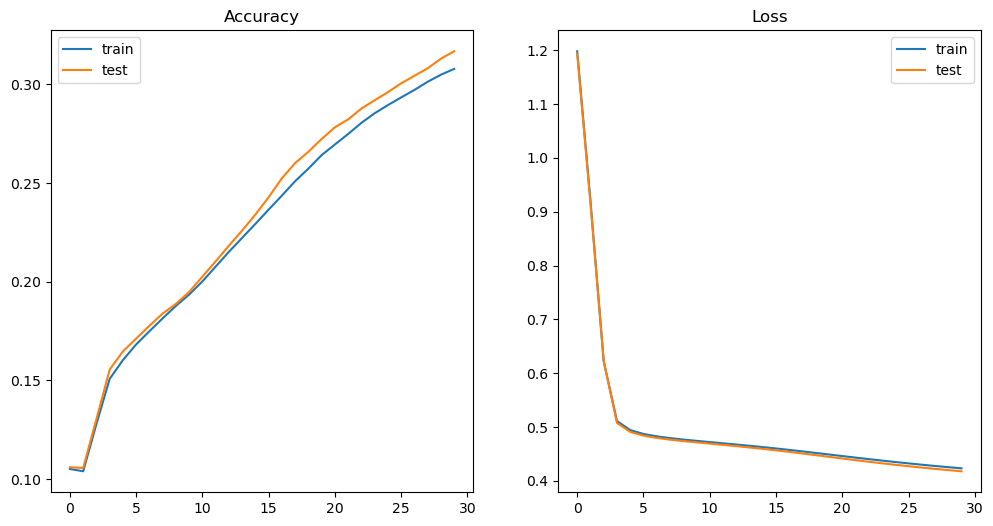

In [19]:
plot_results(results)

### Learning rate too large

In [20]:
NET2 = Network(50)
results2 = NET2.SGD(train_data, 30, 10, 100.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


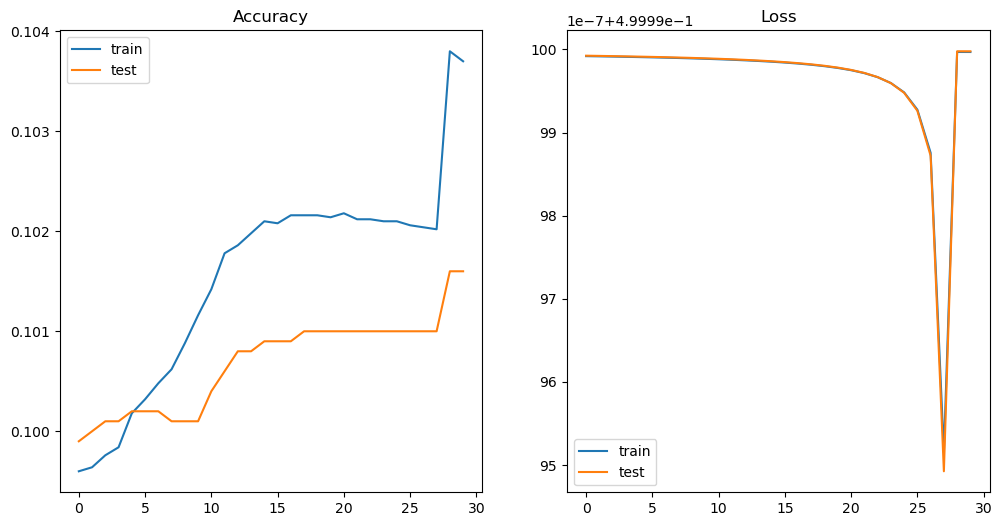

In [21]:
plot_results(results2)

### Better learning rate found by experimentation

In [22]:
NET3 = Network(30)
results3 = NET3.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


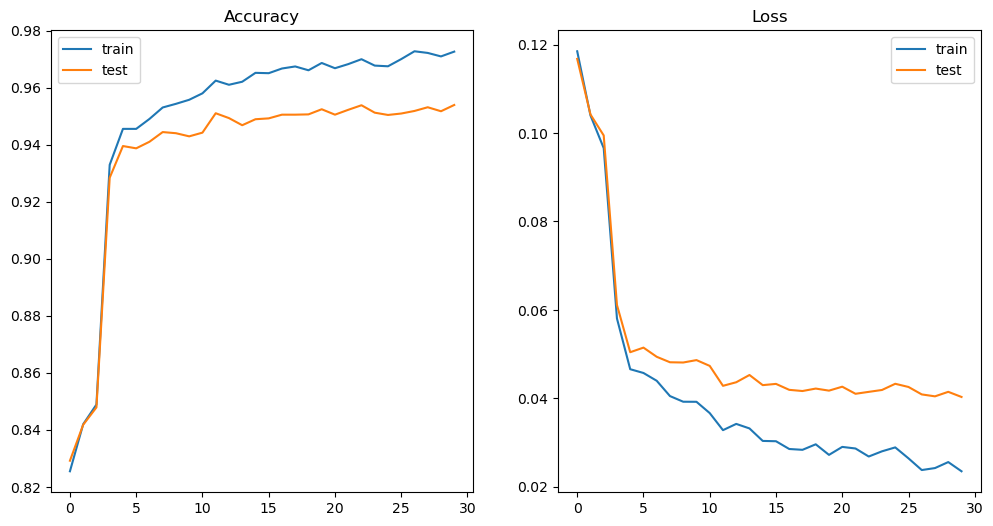

In [23]:
plot_results(results3)

In [24]:
results3

[((0.11848194747963724, 0.8255), (0.11676349177596837, 0.8292)),
 ((0.10398035496428494, 0.842), (0.10420363949559562, 0.8418)),
 ((0.09658322353721976, 0.8489), (0.09944898340986136, 0.8479)),
 ((0.058060196040324655, 0.93292), (0.061113038280582316, 0.9284)),
 ((0.0466014958025711, 0.94552), (0.050445570198775394, 0.9395)),
 ((0.04574972755542315, 0.94552), (0.05148180734390371, 0.9387)),
 ((0.043984804111523564, 0.949), (0.049408966599653006, 0.941)),
 ((0.040527764050580214, 0.95302), (0.04817089093197585, 0.9444)),
 ((0.03924856317790503, 0.9543), (0.04811639002383443, 0.944)),
 ((0.039233873435133314, 0.95572), (0.04866088468835455, 0.9429)),
 ((0.03667962557145739, 0.95798), (0.047350683490450754, 0.9442)),
 ((0.032822739937317026, 0.96244), (0.042845676190116797, 0.951)),
 ((0.03423560874510903, 0.96098), (0.043653311614750036, 0.9493)),
 ((0.03321280948947207, 0.96204), (0.045294000312974404, 0.9468)),
 ((0.030387856917529422, 0.96516), (0.04300111870883074, 0.9489)),
 ((0.030

In [25]:
np.max([x[1][1] for x in results3])

0.9539

The best accuracy on test data we got is **95.33%**. Your result can be somewhat different depending on the randomness.

### Interpreting the neurons

In [26]:
neuron_index = 7
zero_activations = []
one_activations = []
for x, ylabel in test_data:
    if ylabel == 0:
        a = sigmoid(np.dot(NET2.W[neuron_index], x)+NET2.b[neuron_index])
        zero_activations.append(a)
    if ylabel == 1:
        a = sigmoid(np.dot(NET2.W[neuron_index], x)+NET2.b[neuron_index])
        one_activations.append(a)        

In [27]:
len(zero_activations), len(one_activations)

(980, 1135)

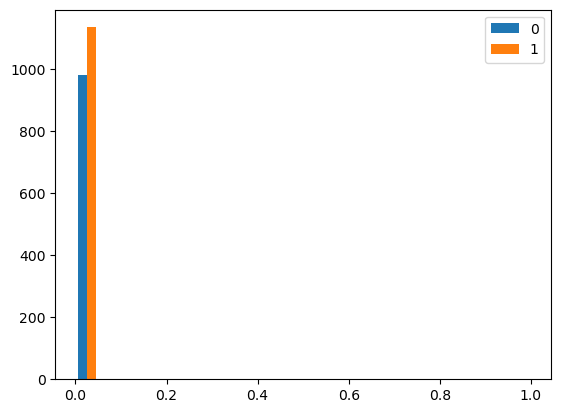

In [28]:
plt.hist([zero_activations, one_activations], bins=20, 
          range=(0, 1), label=['0', '1'])
plt.legend()

In [29]:
neuron_weights = np.reshape(NET2.W[neuron_index], (28, 28))

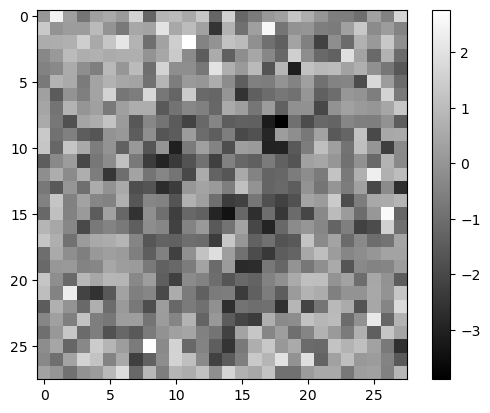

In [30]:
plt.imshow(neuron_weights, cmap='gray')
plt.colorbar()

You can try and interpret the neuron outputs. Exact results will depend on your network.

### Increasing the number of neurons

In [ ]:
NET4 = Network(1000)
#Increase the number of neurons to be 1000
results4 = NET4.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished


In [ ]:
plot_results(results4)

In [ ]:
np.max([x[1][1] for x in results4])